# **下載資料**

In [27]:
import requests
import csv
import os

# os.chdir('/content/drive/MyDrive/Colab Notebooks')
# 開啟 CSV 檔案以供寫入，並加入編碼參數以確保中文正確顯示
with open('csv-aqi.csv', 'w', newline='', encoding='utf-8') as csvfile:
    csv_write = csv.writer(csvfile)  # 設定 csv_write 為寫入

    url = "https://data.epa.gov.tw/api/v2/aqx_p_432?api_key=e8dd42e6-9b8b-43f8-991e-b3dee723a52d&limit=1000&sort=ImportDate%20desc&format=JSON"

    try:
        # 取得 API 資料
        response = requests.get(url)
        response.raise_for_status()  # 如果狀態碼不是 200，則會引發異常

        # 將回應解析為 JSON 格式
        data_json = response.json()

        # 準備寫入 CSV 的資料
        output = [['縣市', '測站', 'aqi', 'pm2.5' ,'空氣品質','資料發布時間']]
        for record in data_json['records']:
            output.append([record['county'], record['sitename'], record['aqi'], record['pm2.5'] ,record['status'],record['publishtime']])
            
            # print([record['county'], record['sitename'], record['aqi'], record['pm2.5'] ,record['status'],record['publishtime']])
        # 寫入 CSV
        csv_write.writerows(output)
        print("資料已成功寫入 CSV 檔案。")

    except requests.exceptions.RequestException as e:
        print("發生錯誤，無法取得資料:", e)


資料已成功寫入 CSV 檔案。


# **測試輸出前5筆**

In [31]:
import pandas as pd
df=pd.read_csv('csv-aqi.csv')


df.head()

,縣市,測站,aqi,pm2.5,空氣品質,資料發布時間
0,基隆市,基隆,32,0,良好,2024/05/20 01:00:00
1,新北市,汐止,28,1,良好,2024/05/20 01:00:00
2,新北市,萬里,28,0,良好,2024/05/20 01:00:00
3,新北市,新店,28,7,良好,2024/05/20 01:00:00
4,新北市,土城,31,7,良好,2024/05/20 01:00:00


# **查詢空氣品質不佳的地區(aqi>100)**

In [32]:
import pandas as pd

# 讀取 CSV 檔案
df = pd.read_csv('csv-aqi.csv')

#  "aqi" 大於 100 的資料
filtered_data = df[df['aqi'] > 100]

# 如果沒有符合條件的資料，顯示"各地空氣品質正常"
if filtered_data.empty:
    print("各地空氣品質正常")
else:
    print(filtered_data)

     縣市  測站  aqi  pm2.5      空氣品質               資料發布時間
43  臺南市  善化  107     48  對敏感族群不健康  2024/05/20 01:00:00
45  臺南市  臺南  108     48  對敏感族群不健康  2024/05/20 01:00:00


# **生成臺北市測站的空氣品質指標散佈圖**

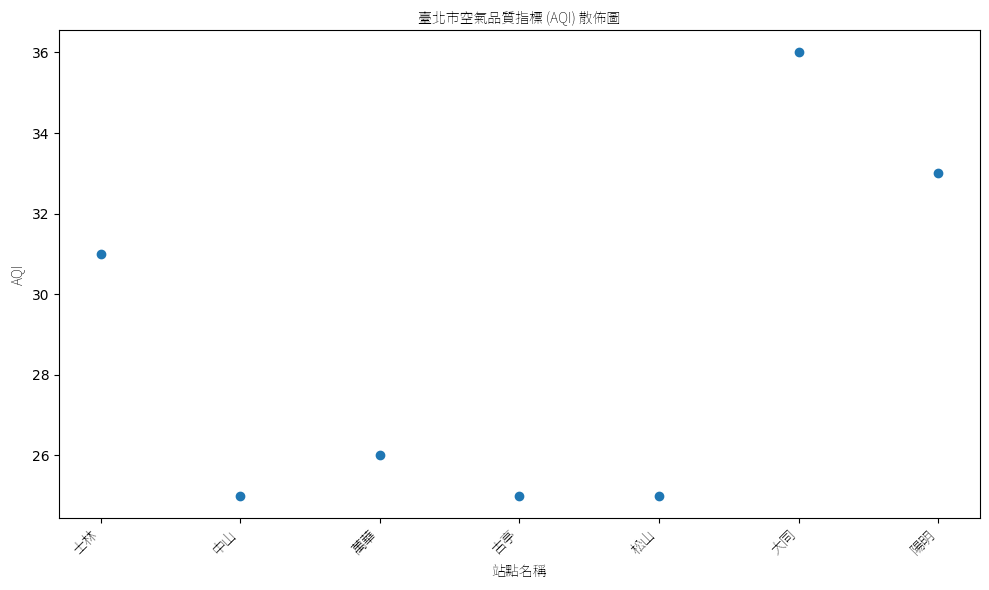

In [33]:
from matplotlib.font_manager import FontProperties
import pandas as pd
import matplotlib.pyplot as plt

# 指定中文字型
font = FontProperties(fname='NotoSansTC-VariableFont_wght.ttf')
# 讀取 CSV 檔案到 DataFrame
df = pd.read_csv('csv-aqi.csv')

# 過濾 "county" 為 "臺北市" 的資料
taipei_data = df[df['縣市'] == '臺北市']

# 繪製散佈圖
plt.figure(figsize=(10, 6))
plt.scatter(taipei_data['測站'], taipei_data['aqi'])
plt.title('臺北市空氣品質指標 (AQI) 散佈圖', fontproperties=font)
plt.xlabel('站點名稱', fontproperties=font)
plt.ylabel('AQI',fontproperties=font)
plt.xticks(rotation=45, ha='right',fontproperties=font)  # 旋轉 x 軸標籤，使其更清晰可讀
plt.tight_layout()
plt.show()